# Investment Analysis Assignment


 ## Importing built in libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading  the companies and rounds2 data

In [2]:
# Creating the companies dataframe 
companies = pd.read_csv('companies.txt',sep="\t",encoding='ISO-8859-1')

In [3]:
# Creating the rounds2 dataframe 
rounds = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')

## Checkpoint 1: Data Cleaning 1

In [4]:
# Removing the special characters in Permalink and name columns.

companies['permalink']=companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

In [5]:
# Removing the special characters in company_permalink and funding_round_permalink columns

rounds['company_permalink']=rounds[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
rounds['funding_round_permalink']=rounds[['funding_round_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

In [6]:
# To avoid duplicate entries  of companies permalink
companies.permalink = companies.permalink.apply(lambda x: x.lower())
companies['name']=companies['name'].str.lower()

In [7]:
# To avoid duplicate entries  of company_permalink in round2 and name
rounds.company_permalink = rounds.company_permalink.apply(lambda x: x.lower())

In [8]:
# How many unique companies are present in rounds2?
print(len(rounds.company_permalink.unique()))

66373


In [9]:
# How many unique companies are present in companies?
print(len(companies.name.unique()))

66038


##### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
    Answer: company name

##### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no
    Answer: No

In [10]:
# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
companies.loc[~rounds.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
729,/organization/abizinabox,abizinabox,http://abizinabox.com,Accounting|Consulting|CRM|Marketing Automation...,operating,USA,IL,Chicago,Evanston,17-08-1998
3166,/organization/analyte-logic,analyte logic,http://analytelogic.com,Biotechnology,operating,USA,CO,Denver,Denver,01-01-2008
4568,/organization/asic-engineering-corporation,asic engineering corporation,NaN,Engineering Firms|Services,closed,NaN,NaN,NaN,NaN,NaN
8097,/organization/boosterville,boosterville,http://www.boosterville.com,K-12 Education|Mobile|Nonprofits|Payments|Soci...,operating,USA,TN,Memphis,Memphis,15-03-2013
8652,/organization/broadlane,broadlane,NaN,Health and Wellness|Health Care|Medical|Services,operating,NaN,NaN,NaN,NaN,NaN
9784,/organization/career-athletes,athlete network,http://athletenetwork.com,Brand Marketing|Internet,operating,USA,KS,Kansas City,Kansas City,01-01-2014
14798,/organization/datanext,"wealtharc, inc.",http://www.wealtharc.com,Artificial Intelligence|Big Data Analytics|Clo...,operating,CHE,24,Steinhausen,Steinhausen,18-02-2015
15384,/organization/detectent,detectent,http://www.detectent.com,Analytics,acquired,USA,CA,San Diego,Escondido,NaN
16018,/organization/dmc-consulting-group,dmc consulting group,http://dmcconsultinggroup.net/,Networking,operating,USA,TX,Dallas,Dallas,11-11-2013
16624,/organization/dscovered,dscovered,http://dscovered.com,Design|Internet|Marketplaces,operating,USA,CA,Bakersfield,California City,01-01-2012


In [11]:
# Name the merged frame master_frame.
master_frame = pd.merge(rounds,companies, left_on="company_permalink", right_on="permalink", how='left')

In [12]:
# How many observations are present in master_frame ?
master_frame.shape

(114949, 16)

### Working only with the master frame.

In [13]:
# Creating a backup dataframe to calculate the percent of data removed from the dataframe
master_frame_backup=master_frame.copy()

In [14]:
# Removing those entries where status is closed 
master_frame = master_frame[master_frame['status']!='closed']

In [15]:
# Removing the null value rows from the 'raised_amount_usd'
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [16]:
# Removing null value rows from the country code column. 
master_frame = master_frame[pd.notnull(master_frame['country_code'])]

In [17]:
# Observations are present in master_frame after filtering 
master_frame.shape

(83264, 16)

In [18]:
# length of master_frame after filtering
len(master_frame.name.unique())

45276

## Checkpoint 2: Funding Type Analysis

In [19]:
# The investment amount for each of the four funding types (venture, angel, seed, and private equity) 
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel                    9.947552e+05
convertible_note         1.341018e+06
debt_financing           1.789101e+07
equity_crowdfunding      5.112600e+05
grant                    4.290738e+06
non_equity_assistance    4.605890e+05
post_ipo_debt            1.754697e+08
post_ipo_equity          6.709361e+07
private_equity           7.579720e+07
product_crowdfunding     1.521050e+06
secondary_market         9.408940e+07
seed                     7.631489e+05
undisclosed              1.601821e+07
venture                  1.190417e+07
Name: raised_amount_usd, dtype: float64

#### Table 2.1: Average Values of Investments for Each of these Funding Types 


 ##### 1. Average funding amount of venture type
    Answer:   1.190315e+07 / 11.90 Million Dollars

 
 
 ##### 2. Average funding amount of angel type
    Answer:    9.947552e+05 / 0.99 Million Dollars
    
 ##### 3. Average funding amount of seed type
    Answer:    7.630973e+05 / 0.76 Million Dollars

 
 ##### 4. Average funding amount of private equity type
    Answer:    7.579720e+07 / 75.80 Million Dollars

 
 ##### 5. Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the     most suitable for it?
    Answer:    Venture Type 
 

In [20]:
# Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5.0e+06,15.0e+06,inclusive=True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

 ###   Answer : Hence proved that Venture type is the  best investment

## Checkpoint 3: Country Analysis

In [21]:
# Spark Funds wants to see the  top nine countries which have received the highest total fundingrs (across ALL sectors for the chosen investment type)
top9  = master_frame.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by = ['raised_amount_usd'],ascending=False).head(9)
top9  ['Rank'] = range(1,10)
top9 .set_index(['Rank'],inplace = True)
print(top9 )

     country_code  raised_amount_usd
Rank                                
1             USA       6.376939e+11
2             CHN       7.469287e+10
3             GBR       3.021650e+10
4             IND       2.718051e+10
5             CAN       1.651205e+10
6             RUS       1.050578e+10
7             DEU       9.709696e+09
8             ISR       9.282365e+09
9             FRA       8.368935e+09


### Table 3.1: Analysing the Top 3 English-Speaking Countries

     1. Top English-speaking country        -       USA       
     2. Second English-speaking country 	-       GBR
     3. Third English-speaking country  	-       IND


## Checkpoint 4: Sector Analysis 1


In [22]:
# Importing the mapping file 
mapping=pd.read_csv('mapping.csv')

In [23]:
# Extract the primary sector of each category list from the category_list column
pri_sector = master_frame['category_list'].str.split('|',n=1,expand=True)
master_frame['Primary_Sector']=pri_sector[0]
mapping['category_list']=mapping['category_list'].str.replace('0','NA')


In [24]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [25]:
#  Print all the column names
massage=pd.melt(mapping,  id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [26]:
# Changing the column names
massage=massage.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [27]:
# We need colums which is filled by 1
massage=massage[massage.value==1]

In [28]:
# Rest we can neglect by  Dropping .
massage=massage.drop('value',axis=1)

In [29]:
# Creating a merged Dataframe master_FT
master_FT = pd.merge(master_frame,massage,on='Primary_Sector',how='inner')

In [30]:
# List of main sectors
master_FT.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                         1666
Blanks                                       430
Cleantech / Semiconductors                 13610
Entertainment                               5522
Health                                      6412
Manufacturing                               5372
News, Search and Messaging                 11229
Others                                     18829
Social, Finance, Analytics, Advertising    14056
Name: main_sector, dtype: int64

In [31]:
# We are removing Blank main sectors
master_FT=master_FT[master_FT.main_sector!='Blanks']

In [32]:
#Now there are 8 main sectors
master_FT.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                         1666
Cleantech / Semiconductors                 13610
Entertainment                               5522
Health                                      6412
Manufacturing                               5372
News, Search and Messaging                 11229
Others                                     18829
Social, Finance, Analytics, Advertising    14056
Name: main_sector, dtype: int64

## Checkpoint 5: Sector Analysis 2


In [33]:
# Copying only those company details for which investemnts have been been between 5 to 15 milions
master_FT_5_15M = master_FT[master_FT['raised_amount_usd'].between(5.0e+06,15.0e+06,inclusive=True)]

In [34]:
# Creating D1, D2 and D3 Datarames
D1 = master_FT_5_15M[master_FT_5_15M['country_code']=='USA']
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_usd'].transform('sum'))

D2 = master_FT_5_15M[master_FT_5_15M['country_code']=='GBR']
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_usd'].transform('sum'))

D3 = master_FT_5_15M[master_FT_5_15M['country_code']=='IND']
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_usd'].transform('sum'))

### 1.Total number of investments (count)

In [35]:
# Country 1
D1.shape[0]




11844

In [36]:
# Country 2
D2.shape[0]



658

In [37]:
# Country 3
D3.shape[0]

299

### 2. Total amount of investment (USD)

In [38]:
# Country 1
D1.raised_amount_usd.sum()

105259690482.0

In [39]:
# Country 2
D2.raised_amount_usd.sum()

5699801756.0

In [40]:
# Country 3
D3.raised_amount_usd.sum()

2661767552.0

### 3. Top sector (based on count of investments)

In [41]:
#Country 1
top_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D1

'Others'

In [42]:
#Country 2
top_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D2

'Others'

In [43]:
# Country 3
top_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D3

'Others'

### 4.Second-best sector (based on count of investments)

In [44]:
#Country 1
sec_best_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D1

'Cleantech / Semiconductors'

In [45]:
# Country 2
sec_best_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D2

'Cleantech / Semiconductors'

In [46]:
# Country 3
sec_best_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D3

'News, Search and Messaging'

### 5.Third-best sector (based on count of investments)

In [47]:
#Country 1
third_best_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D1

'Social, Finance, Analytics, Advertising'

In [48]:
# Country 2
third_best_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D2

'Social, Finance, Analytics, Advertising'

In [49]:
# Country 3
third_best_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D3

'Social, Finance, Analytics, Advertising'

### 6. Number of investments in the top sector (refer to point 3)

In [50]:
# Country 1
D1[D1.main_sector == top_sector_D1].shape[0]

3065

In [51]:
# Country 2
D2[D2.main_sector == top_sector_D2].shape[0]

162

In [52]:
# Country 3
D3[D3.main_sector == top_sector_D3].shape[0]

107

### 7. Number of investments in the second-best sector (refer to point 4)

In [53]:
# Country 1
D1[D1.main_sector == sec_best_D1].shape[0]

2609

In [54]:
# Country 2
D2[D2.main_sector == sec_best_D2].shape[0]

144

In [55]:
# Country 3
D3[D3.main_sector == sec_best_D3].shape[0]

50

### 8.Number of investments in the third-best sector (refer to point 5)

In [56]:
# Country 1
D1[D1.main_sector == third_best_D1].shape[0]

1979

In [57]:
# Country 2
D2[D2.main_sector == third_best_D2].shape[0]

106

In [58]:
# Country 3
D3[D3.main_sector == third_best_D3].shape[0]

34

### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [59]:
# Country 1
D1[D1.main_sector == top_sector_D1].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'1stdibs'

In [60]:
# Country 2
D2[D2.main_sector == top_sector_D2].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'notonthehighstreet'

In [61]:
# Country 3

D3[D3.main_sector == top_sector_D3].sort_values(by = 'raised_amount_usd', ascending= False).head(1)['name'].values[0]

'limeroad'

###  10.For the second-best sector count-wise (point 4), which company received the highest investment?

In [62]:
# Country 1
D1[D1.main_sector == sec_best_D1].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'sunverge energy, inc'

In [63]:
# Country 2
D2[D2.main_sector == sec_best_D2].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'elixent'

In [64]:
# Country 3
D3[D3.main_sector == sec_best_D3].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'mobile2win india'

## Checkpoint 6: Plots


In [65]:
master_frame.to_csv('master_frame.csv')

In [66]:
top9.to_csv('top9.csv')

In [67]:
D1.to_csv('D1.csv')
D2.to_csv('D2.csv')
D3.to_csv('D3.csv')

In [68]:
master_FT = master_FT[master_FT['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

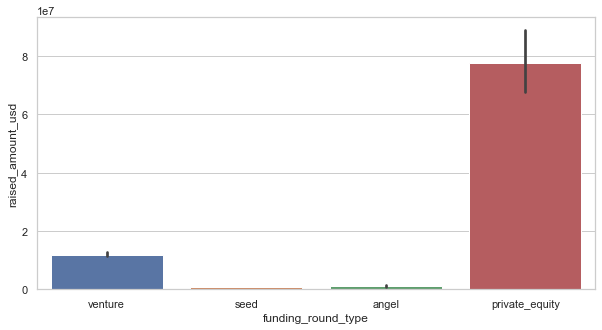

In [69]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,5))
fig = sns.barplot(x='funding_round_type' ,y='raised_amount_usd' ,data =master_FT)
plt.show()

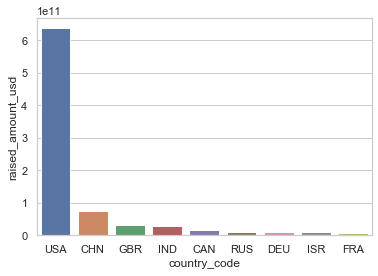

In [70]:
plot2 = sns.barplot(x='country_code' ,y='raised_amount_usd' , data = top9)
plt.show()

In [71]:
plot3 = D1[D1['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
plot3 = plot3.append(D2[D2['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])], ignore_index=True)
plot3 = plot3.append(D3[D3['main_sector'].isin(['Others','News, Search and Messaging','Social, Finance, Analytics, Advertising'])],ignore_index=True)


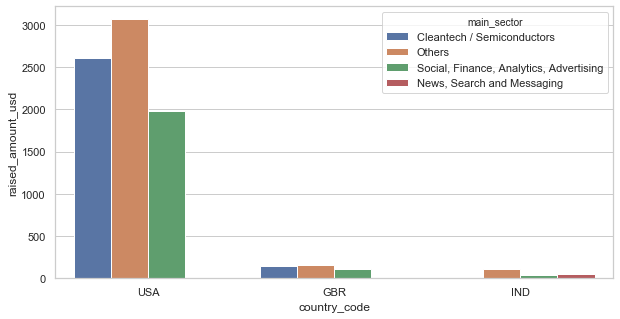

In [72]:
plt.figure(figsize=(10,5))
fig2 = sns.barplot(x='country_code', y = 'raised_amount_usd', hue='main_sector',data = plot3, estimator = lambda x: len(x))
fig2.set(ylabel = 'raised_amount_usd' )
plt.show()